# Python第5次作业

继续使用“数据12.1”，以总店数、年末从业人数、年末餐饮营业面积、统一配送商品购进额4个变量，即V2、V4、V5、V9，对所有样本观测值开展划分聚类分析和层次聚类分析。

1. 载入分析所需要的库和模块
2. 变量设置及数据处理
3. 特征变量相关性分析
4. 使用K均值聚类分析方法对样本示例进行聚类(K=2)
5. 使用K均值聚类分析方法对样本示例进行聚类(K=3)
6. 使用K均值聚类分析方法对样本示例进行聚类(K=4)


## 1. 载入分析所需要的库和模块

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

---

## 2. 变量设置及数据处理

In [2]:
data = pd.read_csv('../data/数据12.1.csv')
X = data.iloc[:, [1,3,4,8]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2      28 non-null     int64  
 1   V4      28 non-null     float64
 2   V5      28 non-null     float64
 3   V9      28 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


In [3]:
len(X.columns)

4

In [4]:
X.columns

Index(['V2', 'V4', 'V5', 'V9'], dtype='object')

In [5]:
X.shape

(28, 4)

In [6]:
X.dtypes

V2      int64
V4    float64
V5    float64
V9    float64
dtype: object

In [7]:
X.isnull().values.any()

np.False_

In [8]:
X.isnull().sum()

V2    0
V4    0
V5    0
V9    0
dtype: int64

In [9]:
X.head(10)

,V2,V4,V5,V9
0,95,16.3,240.8,152.28
1,9,3.5,25.9,5.13
2,5,0.1,4.1,0.61
3,4,0.5,4.1,3.63
4,3,0.3,6.5,0.12
5,13,1.6,35.6,52.85
6,4,0.2,2.9,1.20
7,18,5.6,52.2,23.56
8,31,4.9,68.3,34.52
9,8,1.7,19.9,9.77


In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)
X_s = pd.DataFrame(X_s, columns=X.columns)
X_s

,V2,V4,V5,V9
0,3.331341,2.770017,3.405459,3.989002
1,-0.373910,0.034349,-0.259663,-0.452757
2,-0.546248,-0.692313,-0.631462,-0.589194
3,-0.589332,-0.606824,-0.631462,-0.498035
4,-0.632416,-0.649569,-0.590530,-0.603985
5,-0.201573,-0.371727,-0.094229,0.987683
6,-0.589332,-0.670941,-0.651928,-0.571385
7,0.013849,0.483169,0.188884,0.103557
8,0.573945,0.333562,0.463470,0.434387
9,-0.416995,-0.350355,-0.361993,-0.312698


---

## 3. 特征变量相关性分析

In [11]:
print(X_s.corr(method='pearson'))

          V2        V4        V5        V9
V2  1.000000  0.946057  0.966842  0.938237
V4  0.946057  1.000000  0.977966  0.879125
V5  0.966842  0.977966  1.000000  0.938684
V9  0.938237  0.879125  0.938684  1.000000


<Axes: >

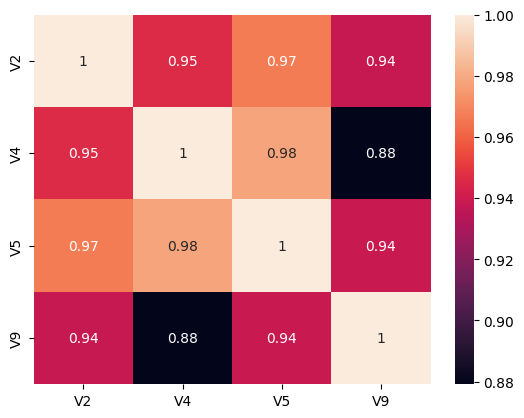

In [12]:
plt.subplot(1,1,1)
sns.heatmap(X_s.corr(), annot=True)

---

## 4. K均值聚类分析

### 4.1 对样本示例进行聚类(K=2)

In [13]:
model = KMeans(n_clusters=2, random_state=2)
model.fit(X_s)
model.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1], dtype=int32)

In [14]:
pd.DataFrame(model.labels_.T, index=data.V1,columns=['聚类'])

,聚类
V1,
北京,1
天津,0
河北,0
山西,0
内蒙古,0
辽宁,0
黑龙江,0
江苏,0
浙江,0


In [15]:
model.cluster_centers_

array([[-0.31703902, -0.32128836, -0.31696734, -0.29871581],
       [ 2.64199186,  2.67740299,  2.64139452,  2.48929838]])

In [16]:
model.inertia_

20.197477847186683

### 4.2 对样本示例进行聚类(K=3)

In [17]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X_s)
model.labels_

array([1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1], dtype=int32)

In [18]:
pd.DataFrame(model.labels_.T, index=data.V1,columns=['聚类'])

,聚类
V1,
北京,1
天津,0
河北,2
山西,2
内蒙古,2
辽宁,0
黑龙江,2
江苏,0
浙江,0


In [19]:
np.set_printoptions(suppress=True)
model.cluster_centers_

array([[ 0.03539069,  0.10060298,  0.10633798,  0.01837419],
       [ 2.64199186,  2.67740299,  2.64139452,  2.48929838],
       [-0.55199216, -0.60254925, -0.59917089, -0.51010914]])

In [20]:
model.inertia_

10.498603411717772

### 4.3 对样本示例进行聚类(K=4)

In [21]:
model = KMeans(n_clusters=4, random_state=3)
model.fit(X_s)
model.labels_

array([3, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1], dtype=int32)

In [22]:
pd.DataFrame(model.labels_.T, index=data.V1,columns=['聚类'])

,聚类
V1,
北京,3
天津,0
河北,2
山西,2
内蒙古,2
辽宁,0
黑龙江,2
江苏,0
浙江,0


In [23]:
model.cluster_centers_

array([[ 0.03539069,  0.10060298,  0.10633798,  0.01837419],
       [ 2.29731732,  2.6310961 ,  2.25936232,  1.7394465 ],
       [-0.55199216, -0.60254925, -0.59917089, -0.51010914],
       [ 3.33134093,  2.77001676,  3.40545892,  3.98900215]])

In [24]:
model.inertia_

5.523575558087604